In [43]:
import requests, json
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

### BITCOIN KZENGINE SIGNAL ANALYSIS

In [44]:
payload = {"ticker":"btc"}
url = "https://4f37-161-97-89-37.ngrok-free.app/signals_ticker"
result = requests.post(url=url, json=payload)

In [50]:
data = json.loads(result.text)
df = pd.DataFrame(data)
df.datetime_t = pd.to_datetime(df.datetime_t)
df.set_index(df.datetime_t, drop=True, inplace=True)
df = df.drop(axis=1, columns=['datetime_t'])
df.sort_index(inplace=True)
df.tail()

,backtest_returns_data,forecast_model,japanese_candle,signal,ticker,tweet_counts
datetime_t,,,,,,
2023-08-06 19:00:00+00:00,"{st_ema_5,st_ema_6,st_willr_8_pct,log_return,s...","{'accuracy_score': 0.56975505857295, 'ai_type'...",CDLLONGLEGGEDDOJI_Bull,1,btc,0
2023-08-06 20:00:00+00:00,"{st_ema_5,st_ema_6,st_willr_8_pct,log_return,s...","{'accuracy_score': 0.5761448349307774, 'ai_typ...",CDLLONGLEGGEDDOJI_Bull,0,btc,0
2023-08-06 21:00:00+00:00,"{st_ema_5,st_ema_6,st_willr_8_pct,log_return,s...","{'accuracy_score': 0.5686900958466453, 'ai_typ...",CDLSHORTLINE_Bull,0,btc,0
2023-08-06 22:00:00+00:00,"{st_ema_5,st_ema_6,st_cut_sma10_close,log_retu...","{'accuracy_score': 0.5686900958466453, 'ai_typ...",CDLLONGLEGGEDDOJI_Bull,0,btc,0
2023-08-06 23:00:00+00:00,"{st_ema_5,st_ema_6,st_cut_sma10_close,log_retu...","{'accuracy_score': 0.5670212765957446, 'ai_typ...",CDLDOJI_Bull,0,btc,0


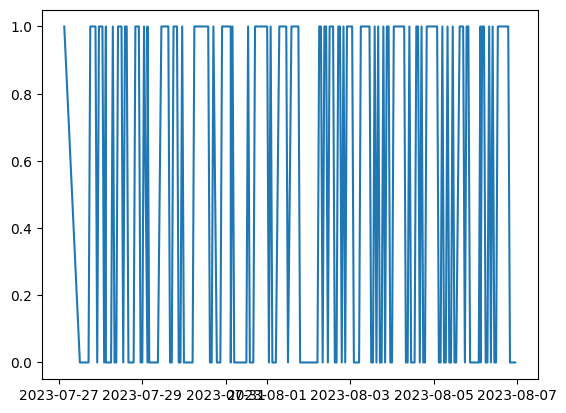

In [51]:
plt.plot(df.index, df['signal'])

[*********************100%***********************]  1 of 1 completed


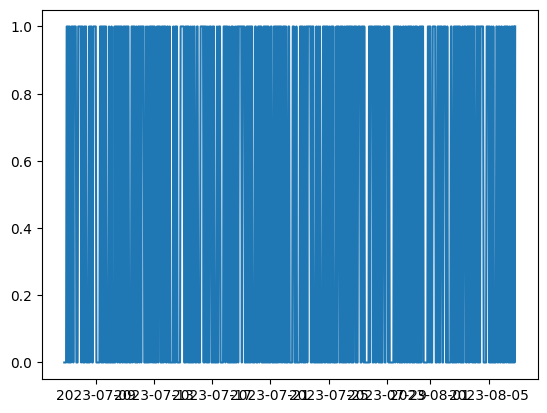

In [47]:
btc_yf = yf.download('BTC-USD', period='1mo', interval='1h')
btc_yf['act_signal'] = np.where(btc_yf['Close'].pct_change() > 0, 1, 0)
plt.plot(btc_yf.index, btc_yf["act_signal"])